In [14]:
# 1. Import the necessary libraries:
from astropy.table import Table
from astropy.io import fits
from astroquery.mast import Observations
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams['figure.figsize'] = (20,7)
plt.style.use("bmh")

In [15]:
#CCD Spectroscopic
#first read the x1d fits file as a hdu list
sx1_file="./Data/CCD_spectro/O5F301010/o5f301010_sx1.fits"
fits.info(sx1_file)

Filename: ./Data/CCD_spectro/O5F301010/o5f301010_sx1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     306   ()      
  1  SCI           1 BinTableHDU    154   1R x 19C   [1I, 1I, 1024D, 1024E, 1024E, 1024E, 1024E, 1024E, 1024E, 1024I, 1E, 1E, 1I, 1E, 1E, 1E, 1E, 1024E, 1E]   


In [16]:
fits.getheader(sx1_file,0)

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS file may contain extensions               
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'HSTIO/CFITSIO March 2010' / FITS file originator                     
DATE    = '2022-04-15' / date this file was written (yyyy-mm-dd)                
NEXTEND =                    1 / Number of extensions                           
FILENAME= 'o5f301010_sx1.fits' / name of file                                   
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'             

In [17]:
fits.getheader(sx1_file,1)

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                38946 / width of table in bytes                        
NAXIS2  =                    1 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   19 / number of fields in each row                   
TTYPE1  = 'SPORDER '           / label for field   1                            
TFORM1  = '1I      '           / data format of field: 2-byte INTEGER           
TTYPE2  = 'NELEM   '           / label for field   2                            
TFORM2  = '1I      '           / data format of field: 2-byte INTEGER           
TTYPE3  = 'WAVELENGTH'      

In [18]:
#another way of reading data
sx1_data = fits.getdata(sx1_file, 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Flux [ergs/s/cm$^2$/$\\AA$]')

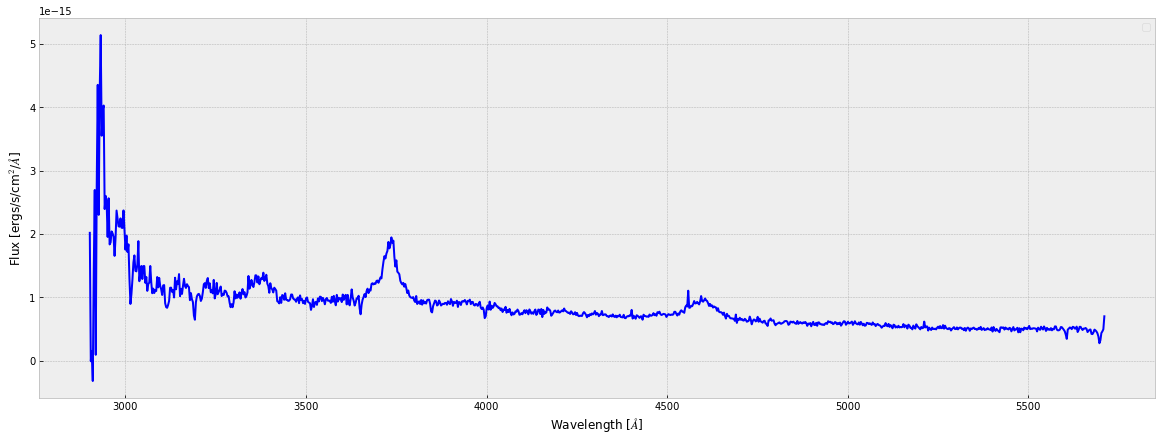

In [19]:
wl = sx1_data["wavelength"].flatten()
flux = sx1_data["flux"].flatten()
order = np.argsort(wl)
wl = np.array(wl)[order]
flux = np.array(flux)[order]
plt.plot(wl, flux, color="blue")
plt.legend(loc="best")
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Flux [ergs/s/cm$^2$/$\AA$]")

In [21]:
#flt image
flt_file="./Data/CCD_spectro/O5F301010/o5f301010_flt.fits"
fits.info(flt_file)

Filename: ./Data/CCD_spectro/O5F301010/o5f301010_flt.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     263   ()      
  1  SCI           1 ImageHDU       118   (1024, 1024)   float32   
  2  ERR           1 ImageHDU        61   (1024, 1024)   float32   
  3  DQ            1 ImageHDU        44   (1024, 1024)   int16   
  4  SCI           2 ImageHDU       118   (1024, 1024)   float32   
  5  ERR           2 ImageHDU        61   (1024, 1024)   float32   
  6  DQ            2 ImageHDU        44   (1024, 1024)   int16   


In [22]:
fits.getheader(flt_file,1)

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1024 / length of data axis 1                          
NAXIS2  =                 1024 / length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
ORIGIN  = 'HSTIO/CFITSIO March 2010' / FITS file originator                     
DATE    = '2022-04-15' / date this file was written (yyyy-mm-dd)                
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1 / extension version number                       
ROOTNAME= 'o5f301010        

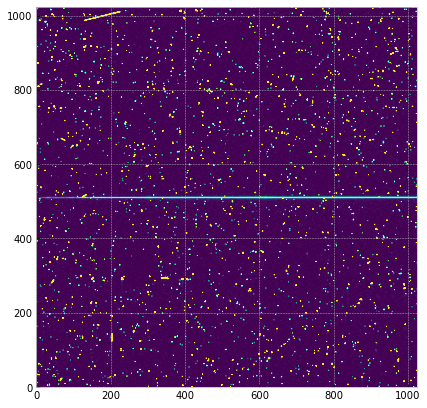

In [24]:
flt_data=fits.getdata(flt_file,1)
plt.imshow(flt_data,origin='lower',vmin=0,vmax=1e2,cmap="viridis")

In [26]:
#crj image
crj_file="./Data/CCD_spectro/O5F301010/o5f301010_crj.fits"
fits.info(crj_file)

Filename: ./Data/CCD_spectro/O5F301010/o5f301010_crj.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     264   ()      
  1  SCI           1 ImageHDU       118   (1024, 1024)   float32   
  2  ERR           1 ImageHDU        61   (1024, 1024)   float32   
  3  DQ            1 ImageHDU        44   (1024, 1024)   int16   


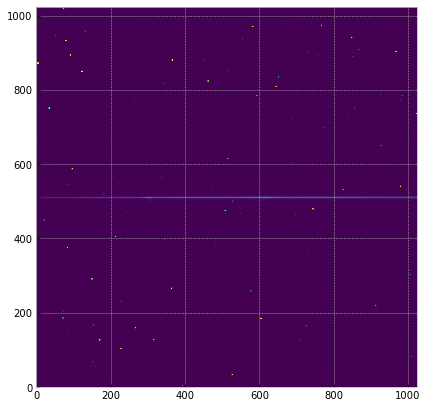

In [27]:
crj_data=fits.getdata(crj_file,1)
plt.imshow(crj_data,origin='lower',vmin=0,vmax=1e3,cmap="viridis")

In [28]:
#CCD imaging
flt_file="./Data/CCD_imaging/ODKZ01010/odkz01010_flt.fits"
fits.info(flt_file)

Filename: ./Data/CCD_imaging/ODKZ01010/odkz01010_flt.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     266   ()      
  1  SCI           1 ImageHDU       101   (1024, 1024)   float32   
  2  ERR           1 ImageHDU        53   (1024, 1024)   float32   
  3  DQ            1 ImageHDU        36   (1024, 1024)   int16   
  4  SCI           2 ImageHDU       101   (1024, 1024)   float32   
  5  ERR           2 ImageHDU        53   (1024, 1024)   float32   
  6  DQ            2 ImageHDU        36   (1024, 1024)   int16   
  7  SCI           3 ImageHDU       101   (1024, 1024)   float32   
  8  ERR           3 ImageHDU        53   (1024, 1024)   float32   
  9  DQ            3 ImageHDU        36   (1024, 1024)   int16   
 10  SCI           4 ImageHDU       101   (1024, 1024)   float32   
 11  ERR           4 ImageHDU        53   (1024, 1024)   float32   
 12  DQ            4 ImageHDU        36   (1024, 1024)   int16   
 13  SCI           5 

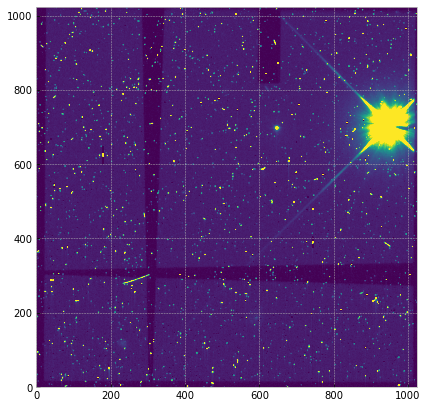

In [29]:
flt_data=fits.getdata(flt_file,1)
plt.imshow(flt_data,origin='lower',vmin=0,vmax=1e2,cmap="viridis")

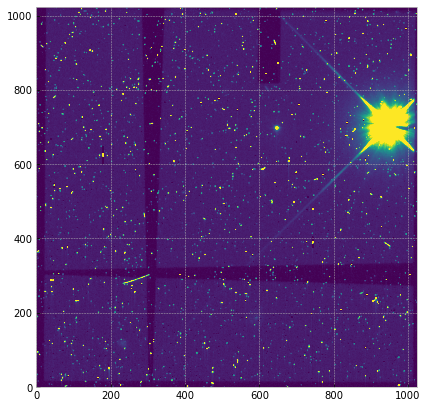

In [30]:
flt_data=fits.getdata(flt_file,1)
plt.imshow(flt_data,origin='lower',vmin=0,vmax=1e2,cmap="viridis")